## **sklearn学习笔记4**⭐
***ROC Curve*** (Receiver Operating Characteristic)  
***AUC*** (Area Under ROC Curve)

#### 🧰[***sklearn.metrics.roc_curve***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)
```python
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
```
计算ROC。  
严格遵循二进制分类任务。

- Parameters:
  - y_true: ndarray of shape (n_samples,)  
    真正的二进制标签。  
    如果标签不是｛-1，1｝或｛0，1｝，则应显式给出pos_label。
  - y_score: ndarray of shape (n_samples,)  
    目标分数可以是正类的概率估计、置信值，也可以是决策的非阈值度量（由某些分类器上的“decision_function”返回）。
  - pos_label: int or str, default=None  
    正类的标签。当pos_label＝None时，如果y_true在｛-1，1｝或｛0，1｝中，则pos_label设置为1，否则将引发错误。
  - sample_weight: array-like of shape (n_samples,), default=None  
    样本权重。
  - drop_intermediate: bool, default=True  
    是否降低一些不会出现在绘制的ROC曲线上的次优阈值。这对于创建较轻的ROC曲线非常有用。
- Returns:
  - fpr: ndarray of shape (>2,)
  - tpr: ndarray of shape (>2,)
  - thresholds: ndarray of shape = (n_thresholds,)

In [17]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr,tpr,thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))

#### 🧰[***sklearn.metrics.auc***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc)
```python
sklearn.metrics.auc(x, y)
```
使用梯形规则计算曲线下面积（AUC）。  
这是一个一般函数，给定曲线上的点。

- Parameters:
  - x: ndarray of shape (n,)   
    X坐标。  
    这些必须是单调递增或单调递减。
  - y: ndarray of shape, (n,)  
    Y坐标。
- Returns:
  - auc: float  
    曲线下面积。

In [18]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

#### 🧰[***sklearn.metrics.roc_auc_score***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
```python
sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
```
根据预测计算ROC曲线下的面积（ROC AUC）。  
注意：此实现可以用于二进制、多类和多标签分类，但有一些限制（请参见参数）。

- Parameters:
  - y_true: array-like of shape (n_samples,) or (n_samples, n_classes)  
    真标签或二进制标签指示器。  
    二进制和多类情况下需要具有形状（n_samples，）的标签，而多标签情况下需要带有形状（n_samples，n_class）的二进制标签指示符。
  - y_score: array-like of shape (n_samples,) or (n_samples, n_classes)  
    目标分数。
    - binary case:  
      对应于形状（n_samples，）数组。可以提供概率估计和非阈值判定值。  
      概率估计对应于具有较大标签的类的概率`estimator.predict_proba(X, y)[:, 1]`；  
      决策值对应于`estimator.decision_function(X, y)`。
    - multiclass case:
      对应于由predict_proba方法提供的概率估计的形状（n_samples, n_classes）数组。  
      概率估计值必须在所有可能的类别中总和为1。此外，类分数的顺序必须对应于标签的顺序（如果提供），或者对应于y_true中标签的数字或词典顺序。
    - multilabel case:
      对应于形状（n_samples, n_classes）数组。  
      概率估计由predict_proba方法提供，非阈值决策值由decision_function方法提供。概率估计对应于分类器的每个输出具有较大标签的类的概率。
  - average: {‘micro’, ‘macro’, ‘samples’, ‘weighted’} or None, default=’macro’  
    如果为“无”，则返回每个类的分数。否则，这将确定对数据执行的平均类型。  
    注：多类ROC AUC目前仅处理“宏观”和“加权”平均值。对于多类目标，仅对multi_class='ovo'实现average=None。
    - `micro`: 通过将标签指示符矩阵的每个元素视为标签来全局计算度量。
    - `macro`: 计算每个标签的度量，并找到它们的未加权平均值。这没有考虑到标签不平衡。
    - `weighted`: 计算每个标签的度量值，并找到它们的平均值，按支持度加权（每个标签的真实实例数）。
    - `samples`: 计算每个实例的指标，并找出它们的平均值。
  
    当y_true为二进制时将被忽略。
  - sample_weight: array-like of shape (n_samples,), default=None  
    样本权重。
  - max_fpr: float > 0 and <= 1, default=None  
    如果不是None，则返回范围[0，max_fpr]上的标准化部分AUC。  
    对于多类情况，max_fpr应等于None或1.0，因为多类当前不支持AUC ROC部分计算。
  - multi_class: {‘raise’, ‘ovr’, ‘ovo’}, default=’raise’  
    仅用于多类目标。确定要使用的配置类型。默认值 引发错误，因此必须显式传递“ovr”或“ovo”。  
    - `ovr`: Stands for One-vs-rest. 
    - `ovo`: Stands for One-vs-one. 
  - labels: array-like of shape (n_classes,), default=None  
    仅用于多类目标。索引y_score中的类的标签列表。如果为“无”，则使用y_true中标签的数字或词典顺序。
- Returns:
  - auc: float  
    曲线下面积。


***Binary case:***

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(roc_auc_score(y, clf.predict_proba(X)[:, 1]))

print(roc_auc_score(y, clf.decision_function(X)))

0.9946488029173934
0.9946488029173934


***Multiclass case:***

In [20]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

***Multilabel case:***

In [23]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
X, y = make_multilabel_classification(random_state=0)
clf = MultiOutputClassifier(clf).fit(X, y)
# get a list of n_output containing probability arrays of shape
# (n_samples, n_classes)
y_pred = clf.predict_proba(X)
# extract the positive columns for each output
y_pred = np.transpose([pred[:, 1] for pred in y_pred])
print(roc_auc_score(y, y_pred, average=None))

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X, y)
print(roc_auc_score(y, clf.decision_function(X), average=None))


[0.82664884 0.86034414 0.94181818 0.8502652  0.94809095]
[0.81996435 0.8467387  0.93090909 0.87229702 0.94422994]


### ***Example ROC/AUC plot***📐

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [6]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2]) # onehot编码
n_classes = y.shape[1] # 类别数量

In [8]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [10]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [13]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

### ***Plot of a ROC curve for a specific class***

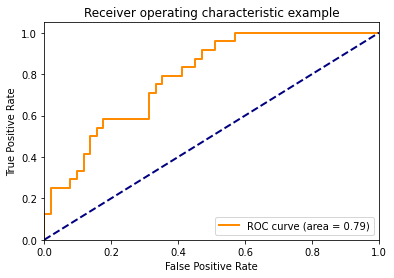

In [14]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### ***Plot ROC curves for the multiclass problem***

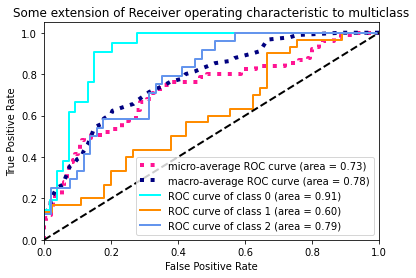

In [15]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### ***Area under ROC for the multiclass problem***

In [16]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
